#### Business Understanding

Business Problem: Bagaiamana cara meingkatkan revenue and mengurangi cost dengan memprediksi pelanggan mana yang lebih mungkin untuk berlangganan jika dihubungi?

Objective: Build a model klasifikasi untuk memprediksi probabilitas pelanggan akan berlangganan.

#### Data Cleansing

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv("bank_deposit.csv")

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [15]:
## Check missing values

In [17]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [23]:
## check outliers

In [25]:
df_num = df.select_dtypes(["int64"])
col_num = df_num.columns
col_num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [36]:
for col in col_num:
    print(f"Running for {col}")
    q1 =df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for age
(171, 17)
Running for balance
(1055, 17)
Running for day
(0, 17)
Running for duration
(636, 17)
Running for campaign
(601, 17)
Running for pdays
(2750, 17)
Running for previous
(1258, 17)


In [38]:
for col in col_num:
    print(f"Running for {col}")
    q1 =df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]

Running for age
Running for balance
Running for day
Running for duration
Running for campaign
Running for pdays
Running for previous


In [42]:
df.shape

(6498, 17)

In [44]:
## Check duplicates

In [46]:
df.duplicated().sum()

0

#### EDA

In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6498 entries, 3 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6498 non-null   int64 
 1   job        6498 non-null   object
 2   marital    6498 non-null   object
 3   education  6498 non-null   object
 4   default    6498 non-null   object
 5   balance    6498 non-null   int64 
 6   housing    6498 non-null   object
 7   loan       6498 non-null   object
 8   contact    6498 non-null   object
 9   day        6498 non-null   int64 
 10  month      6498 non-null   object
 11  duration   6498 non-null   int64 
 12  campaign   6498 non-null   int64 
 13  pdays      6498 non-null   int64 
 14  previous   6498 non-null   int64 
 15  poutcome   6498 non-null   object
 16  deposit    6498 non-null   object
dtypes: int64(7), object(10)
memory usage: 913.8+ KB


In [53]:
## Univariate Analysis

In [55]:
col_num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [57]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.0,6498.0
mean,40.222530,749.580025,15.746537,313.542167,2.090951,-1.0,0.0
std,10.758377,975.325828,8.448083,241.626452,1.303743,0.0,0.0
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.0,0.0
25%,32.000000,68.000000,8.000000,129.000000,1.000000,-1.0,0.0
50%,38.000000,389.500000,16.000000,236.000000,2.000000,-1.0,0.0
75%,48.000000,1116.500000,22.000000,440.000000,3.000000,-1.0,0.0
max,74.000000,4025.000000,31.000000,1023.000000,6.000000,-1.0,0.0


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
col_num = col_num.tolist()

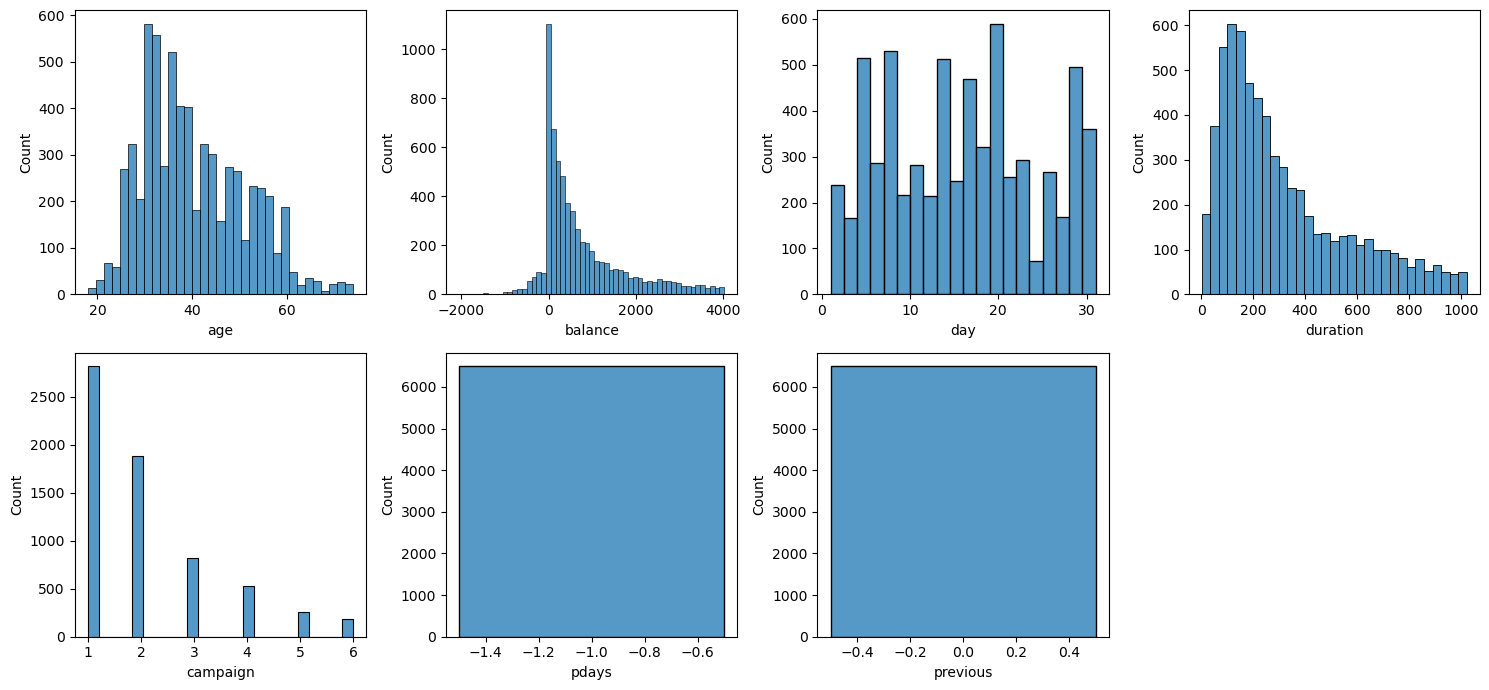

In [67]:
plt.figure(figsize = (15,7))
for i in range(len(col_num)):
    plt.subplot(2,4,i+1)
    sns.histplot(x=col_num[i], data = df)
    plt.tight_layout()

In [69]:
## Multivariate Analysis

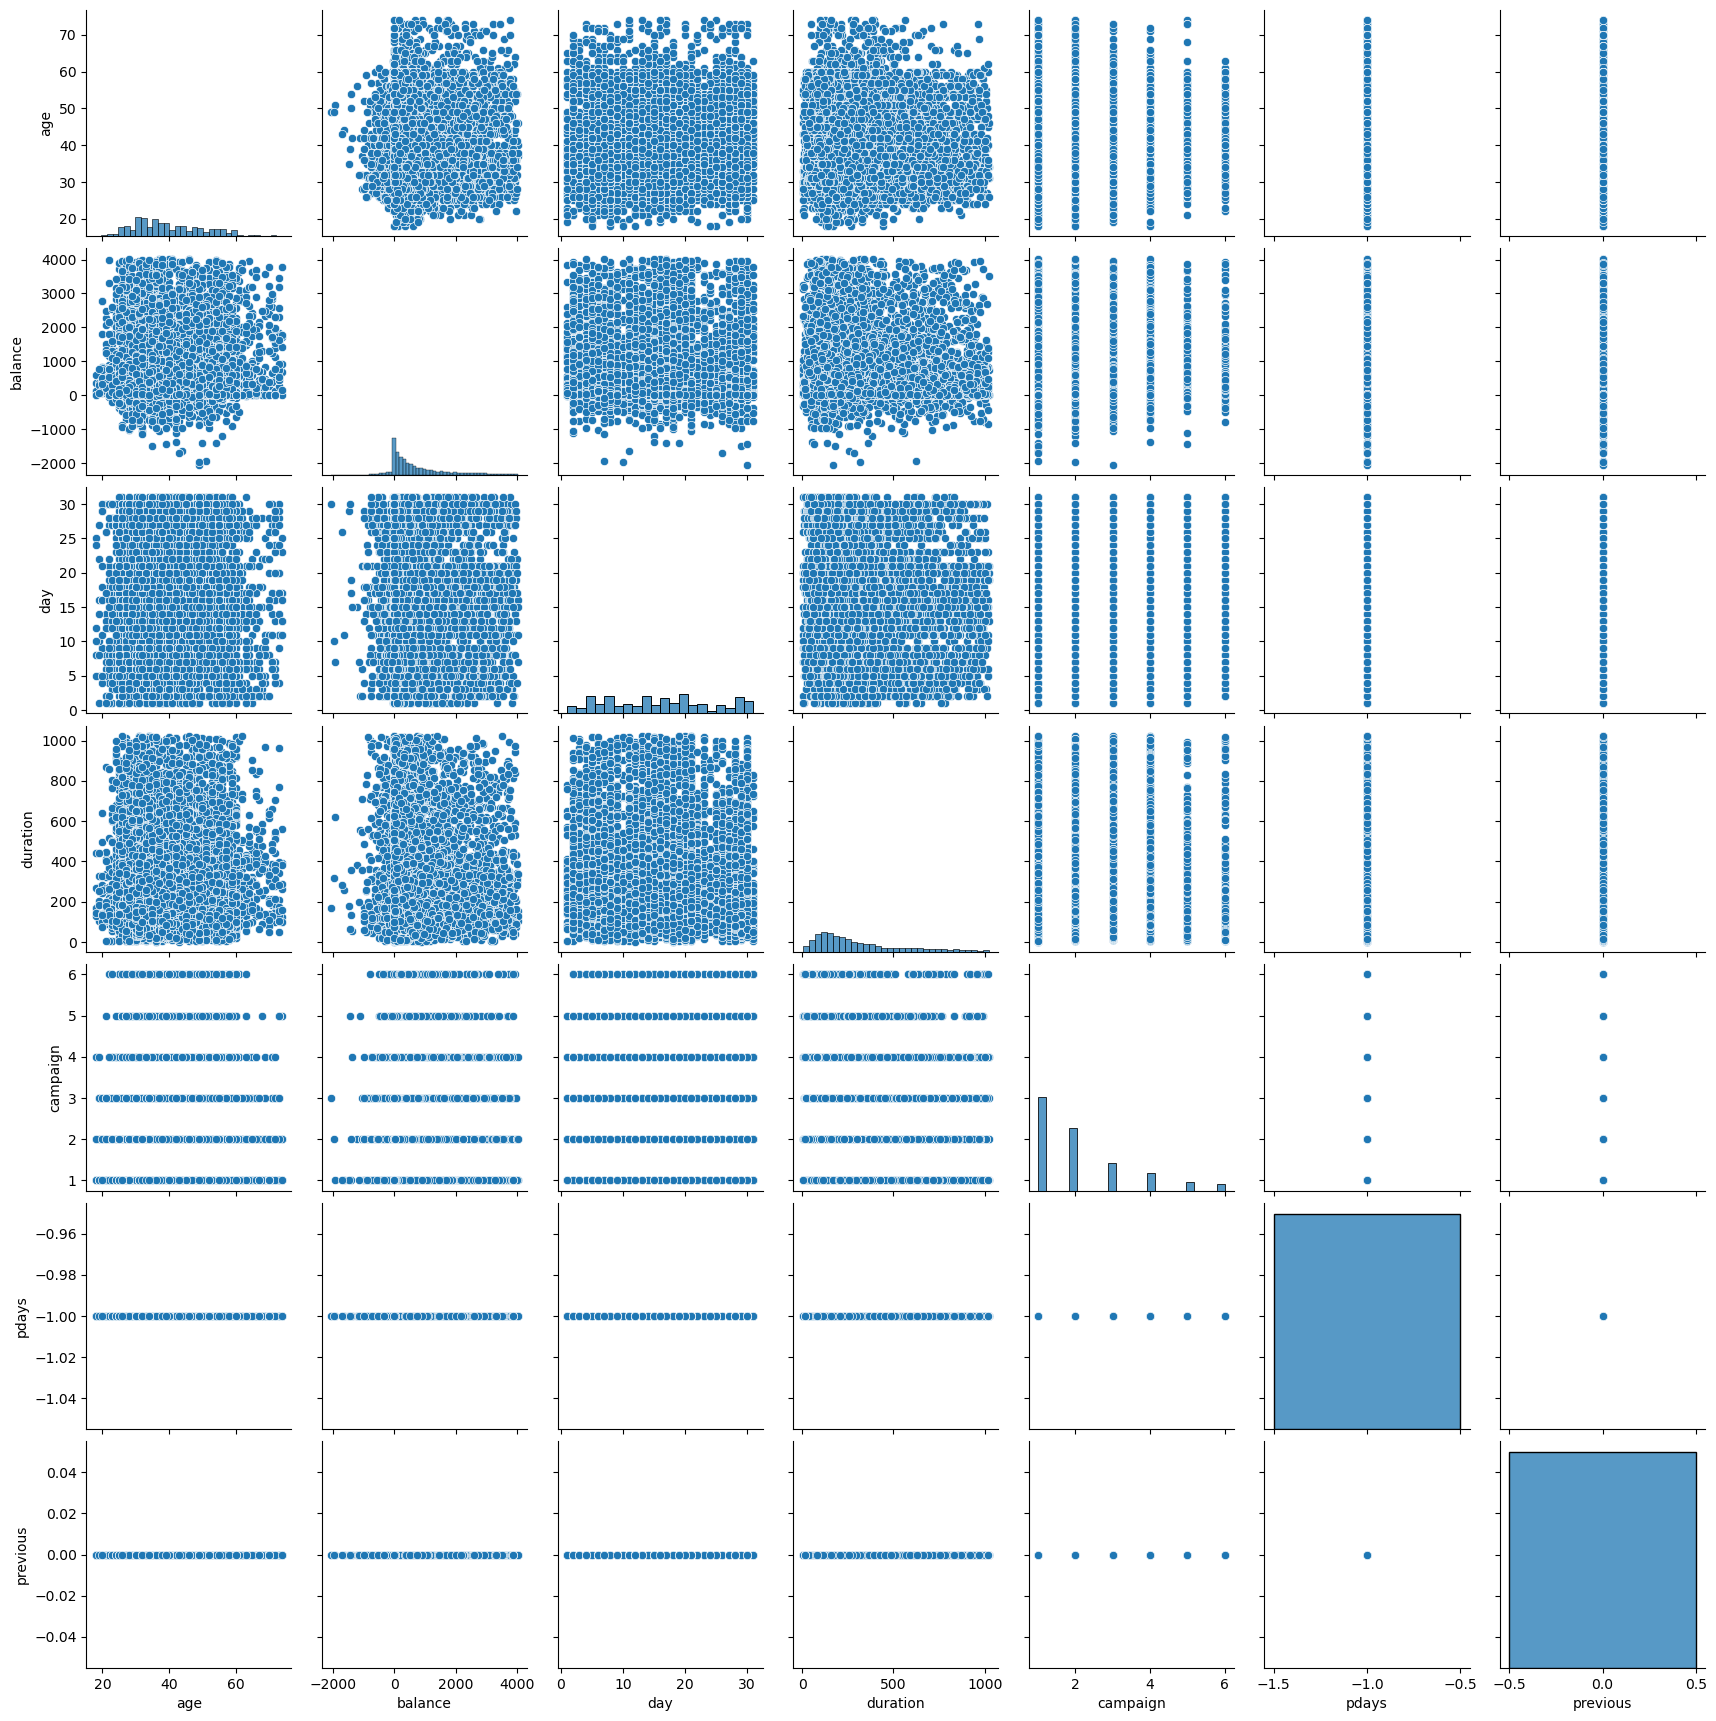

In [71]:
sns.pairplot(df[col_num])

In [73]:
# tdk ada variable yg berkorelasi

<Axes: >

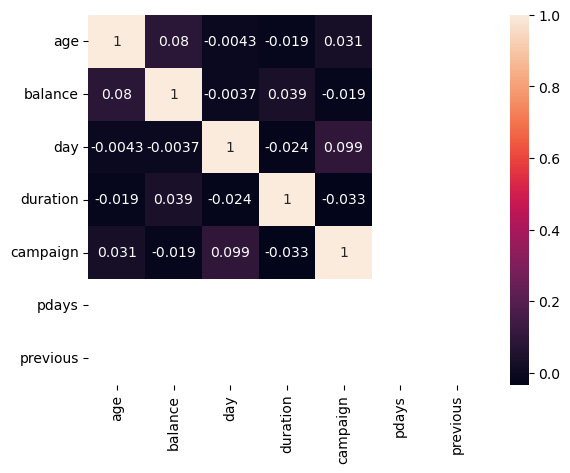

In [75]:
## heatmap
sns.heatmap(df[col_num].corr(), annot = True)

#### Additional Data Preparation bbefore Modeling

In [82]:
## Feature Engineering

In [84]:
#metode bining

In [94]:
df["balance_group"] = "positive"

In [96]:
df.loc[df["balance"] < 0, "balance_group"] = "negative"

In [100]:
df.loc[df["balance"] == 0, "balance_group"] = "empty"

In [102]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,positive
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,positive
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,empty
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,positive
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no,negative
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,positive
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,positive
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,positive


In [104]:
## One Hot Encoding

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6498 entries, 3 to 11161
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            6498 non-null   int64 
 1   job            6498 non-null   object
 2   marital        6498 non-null   object
 3   education      6498 non-null   object
 4   default        6498 non-null   object
 5   balance        6498 non-null   int64 
 6   housing        6498 non-null   object
 7   loan           6498 non-null   object
 8   contact        6498 non-null   object
 9   day            6498 non-null   int64 
 10  month          6498 non-null   object
 11  duration       6498 non-null   int64 
 12  campaign       6498 non-null   int64 
 13  pdays          6498 non-null   int64 
 14  previous       6498 non-null   int64 
 15  poutcome       6498 non-null   object
 16  deposit        6498 non-null   object
 17  balance_group  6498 non-null   object
dtypes: int64(7), object(11)
memory u

In [108]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,positive
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,positive
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,empty
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,positive
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes,positive


In [122]:
df_obj = df.select_dtypes(["object"])
col_obj = df_obj.columns.tolist()
col_obj

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit',
 'balance_group']

In [124]:
col_obj.remove("deposit")
col_obj

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'balance_group']

In [128]:
df = pd.get_dummies(df, columns = col_obj)

In [130]:
df

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown,balance_group_empty,balance_group_negative,balance_group_positive
3,55,2476,5,579,1,-1,0,yes,False,False,...,False,False,True,False,False,False,True,False,False,True
4,54,184,5,673,2,-1,0,yes,True,False,...,False,False,True,False,False,False,True,False,False,True
5,42,0,5,562,2,-1,0,yes,False,False,...,False,False,True,False,False,False,True,True,False,False
8,37,1,6,608,1,-1,0,yes,False,False,...,False,False,True,False,False,False,True,False,False,True
10,38,100,7,786,1,-1,0,yes,True,False,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,-1,0,no,False,True,...,False,False,False,False,False,False,True,False,True,False
11157,33,1,20,257,1,-1,0,no,False,True,...,False,False,False,False,False,False,True,False,False,True
11158,39,733,16,83,4,-1,0,no,False,False,...,True,False,False,False,False,False,True,False,False,True
11159,32,29,19,156,2,-1,0,no,False,False,...,False,False,False,False,False,False,True,False,False,True


In [132]:
## Train test split

In [142]:
X = df.drop(columns = ["deposit"])
y = df["deposit"].map({"yes":1, "no":0})

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [150]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4548, 51)
(1950, 51)
(4548,)
(1950,)


#### Modeling and Evaluation

In [155]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
params = {
    "max_depth": [2,3,5,10,15],
    "min_samples_leaf": [20,30,50,100]
}

In [165]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 5,
                           scoring = "roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10, 15],
                         'min_samples_leaf': [20, 30, 50, 100]},
             scoring='roc_auc')

In [167]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=20)

In [169]:
## Evaluation

In [173]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rfbest = rf_best.predict(X_test)

In [175]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.6841359773371105
0.7932011331444759
0.7535410764872521


In [177]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.7123893805309734
0.7547169811320755
0.7337931034482759


In [179]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rfbest = rf_best.predict_proba(X_test)[:,1]

In [181]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rfbest))

0.7636917828807738
0.9060942951094432
0.8937574578942096


#### Business Conclucion

Business Impact:

Final model = Random Forest without Hyperparameter Tuning

Perecision = 75%, Recall = 79%

Assume for every 100 customers, 20 akan subscribe

Before the model:
- Tidak tahu yang akan subscribe, hubungi semua customer
- Cost: 100*10K = 1 mio
- Revenue: 20*100K = 2 mio
- Profit: 1 mio

After the model:
- Cost: Subscribed/Precision * 10K
      = 20/0.75 * 10K
      = 26 * 10K = 260K
- Revenue: (Recall * Subscribed) * 100K
        = (0.79 * 20) * 100K
        = 1.58 * 100K = 1.58 mio
- Profit: 1.3 mio